# Symmetric solution of head decay in strip

IHE, transient groundwater

Olsthoorn, 2019-01-02

A solution, which shows the deline of the head in a strip due to bleeding to the fixed heads at both ends.

$$ s(x, t) = A \frac 4 \pi \sum _{j=1} ^\infty \left\{
\frac {(-1)^{j-1}} {2 j - 1}
\cos \left[(2 j -1) \frac \pi 2 \frac x b \right]
\exp \left[ -(2 j - 1)^2  \left( \frac \pi 2 \right)^2 \frac {kD} {b^2 S} t \right]
\right\} $$

To make sure that both reflex decay of an initial head of $a$ above the fixed heads at $x \pm L/2 = b$, we have to subtract the sudden head solutions from the initial head $a$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [4]:
L = 150 # m (strip width)
b =L/2 # [m] half width of strip
x = np.linspace(-L/2, L/2, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change at x = -L/2
times = np.linspace(0, 0.5, 11)[1:] #        

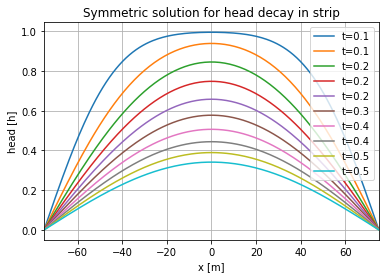

In [6]:
plt.title('Symmetric solution for head decay in strip')
plt.xlabel('x [m]')
plt.ylabel('head [h]')
plt.grid()
plt.xlim((-b, b))
for t in times:
    h = np.zeros_like(x)
    for j in range(1,20):
        h += a * 4  / np.pi * ((-1)**(j-1) / (2 * j - 1) *
            np.cos((2 * j - 1) * np.pi / 2 * x / b) *
            np.exp(- (2 * j - 1)**2 * (np.pi / 2)**2 * kD /(b**2 * S) * t))
    plt.plot(x, h, label='t={:.1f}'.format(t))
plt.legend()
plt.show()

Let's take a time and show how the individual terms add up to yield the final solution.

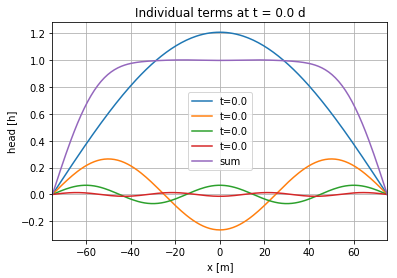

In [9]:
t = 0.02 # d

plt.title('Individual terms at t = {:.1f} d'.format(t))
plt.xlabel('x [m]')
plt.ylabel('head [h]')
plt.xlim((-b, b))
plt.grid()

H = np.zeros_like(x)
for j in range(1,5):
    h = a * 4  / np.pi * ((-1)**(j-1) / (2 * j - 1) *
        np.cos((2 * j - 1) * np.pi / 2 * x / b) *
        np.exp(- (2 * j - 1)**2 * (np.pi / 2)**2 * kD /(b**2 * S) * t))
    plt.plot(x, h, label='t={:.1f}'.format(t))
    H += h
plt.plot(x, H, label='sum')
plt.legend()
plt.show()